<a href="https://colab.research.google.com/github/RakshitaRuparel/Neural-Network-CSclub/blob/main/Copy_of_Student_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"><h1><b> * MAKE A COPY OF THIS NOTEBOOK SO YOUR EDITS ARE SAVED *</b></h1></font>


<h1>🐶<b><i> Neural Networks: Classifying Images for a Self-Driving Car</i></b></h1>

---
---
# **🔎 Introduction**


We work for CC: ConscientiousCars, where we help self-driving vehicles be more conscientious of their surroundings. Our cars have been very good at recognizing and avoiding humans. They haven't, however, been capable of recognizing dogs. Since dogs are man's best friend and will always be where we humans are, we want our cars to know if a dog is on the road in front of them and avoid the dog!

The first step to avoiding these cute puppies is **knowing if a puppy is in front of the car**. So today we will **build a detector that can tell the difference between a dog and a road in front of it**!



## Table of Contents

You can find a more detailed Table of Contents by clicking on the icon on the left sidebar that looks like this: <img src="https://drive.google.com/uc?export=view&id=1AGUz4POrRWu_6n5yI_YdO4qFRr41_PzE" width=20>.

>[🔎 Introduction](#scrollTo=ZX7thGJj0bcp)

>>[Table of Contents](#scrollTo=vLdE8vzi0ZD7)

>[📊 Milestone 1: Data Exploration](#scrollTo=1QxGsnvhnn8R)

>>[1.1. Introducing the Data](#scrollTo=btr24O6Hqgo6)

>>[1.2. Understanding our Data Representation](#scrollTo=PHS0E_3wt0RS)

>[(Optional) 🏘 Milestone 2: K-Nearest Neighbors (KNN)](#scrollTo=tUjr5CKnhvtg)

>[🧠 Milestone 3: Neural Networks](#scrollTo=doLXp1Ot8D2C)

>>[3.1. Building a Neural Network using Scikit-Learn](#scrollTo=pabMQ8tIv9Ef)

>[(Optional) 🖼 Milestone 4: Convolutional Neural Networks](#scrollTo=37O_VE_D1Bdy)

>>[(Optional) 4.1. CNNClassifier Class Background](#scrollTo=GqrfI4JiVeFr)

>>[4.2. Using the CNNClassifier](#scrollTo=9GjIRoWe0DzQ)

>>[4.3. Training and Validation Curves](#scrollTo=c-XRh5Y5P_CL)

>[(Optional Challenge) 🔍 Milestone 5: Explainability through Saliency Maps](#scrollTo=7Y1wGoQPm2Ko)

>[🤔 Knowledge Check](#scrollTo=Yswq2Dyvd6jU)

>[📋 Cheat Sheets](#scrollTo=XPr7W1g93cSe)



In [1]:
#@title **🏗 Setup Cell**
#@markdown **Run this to import libraries and download data!**

from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Inspirit's util file and discussion exercise answer handler
!wget -q "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Modules/inspiritai_util.py"
from inspiritai_util import handle_discussion_response

# Loading in data
def load_data():
  !wget -q --show-progress -O cifar_data https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads

  import pickle
  data_dict = pickle.load(open( "cifar_data", "rb" ));

  data   = data_dict['data']
  labels = data_dict['labels']

  return data, labels

data, labels = load_data()

# Function for plotting images
def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt

  img   = data[img_idx, :].reshape([32,32,3]).copy()
  label = labels[img_idx]

  fig, ax = plt.subplots(1,1)
  img = ax.imshow(img.astype('uint8'), extent=[-1,1,-1,1])

  x_label_list = [0, 8, 16, 24, 32]
  y_label_list = [0, 8, 16, 24, 32]

  ax.set_xticks([-1, -0.5, 0, 0.5, 1])
  ax.set_yticks([-1, -0.5, 0, 0.5, 1])

  ax.set_xticklabels(x_label_list)
  ax.set_yticklabels(y_label_list)

  ax.set_title(f'Image: {img_idx} | Label: {label}')

  display(fig)
  plt.close(fig)

cifar_data          100%[===================>]   3.52M  2.79MB/s    in 1.3s    


---
---
# **📊 Milestone 1: Data Exploration**

## 1.1. Introducing the Data

Let's take a look at the dataset that can help our car's model tell the difference between roads and dogs. The dataset has been loaded in as `data` (the images) and `labels` (the classifications of each of the images). Note that we won't be working with Pandas DataFrames in this notebook since we're working with image data.

Try running the cell below and changing the number to see what changes!

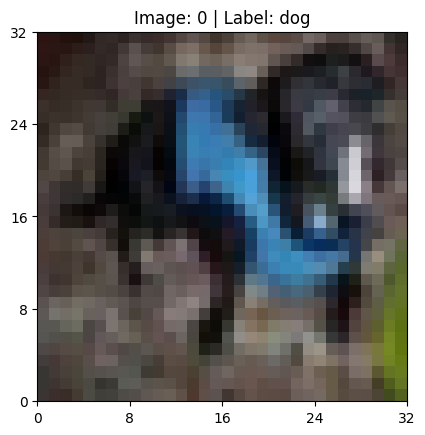

In [2]:
plot_one_image(data, labels, 0) # Change this number

### 1.1.1. Discussion Exercise




In [ ]:
#@markdown *Why might we be using such blurry images?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)

Next, let's try out a road image if you haven't already. Again, try changing the number:

In [ ]:
plot_one_image(data, labels, 700) # Change this number

How many images do we have? Let's take a look at the length of the data using the familiar `len()` function below!

In [ ]:
print(len(data))

### 1.1.2. Discussion Exercise

Run the code cell below to use the `Counter` class in Python, which is a quick and easy way of counting up the number of times each label shows up.

In [ ]:
print(Counter(labels))

In [ ]:
#@markdown *How many of each do we have? Why would it be important we have this amount of each?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)

### (Optional) 1.1.3. Coding Exercise

> Try this out if you want to use a for loop to look at more images in the dataset.

Use the code cell below to use a for loop to plot multiple images using the `plot_one_image()` function.

If you're not sure how to write for loops in Python, ask your instructor or feel free to refer to the [for loop reference at the end of the notebook](#scrollTo=BGPXO0mm8Uc9)!

In [ ]:
### YOUR CODE HERE


### END CODE

## 1.2. Understanding our Data Representation

Let's see what the raw data looks like. The cell below will print out `data[0]` for you, which is the first image.

> The `data[0]` notation is our way of telling Python which of the items we want from a list of items (in this case, which image we want out of the whole array of images in `data`). You can change the `0` like you did with `plot_one_image()` to see what different images may look like in numerical format!

In [ ]:
print('One image looks like:', data[0])

That doesn't give us the whole picture, so run the cell below to see the length of the list of numbers representing the image.

In [ ]:
print("Length of list:", len(data[0]))

### 1.2.1. Discussion Question

In [ ]:
#@markdown *Using the images we plotted earlier and what you've learned about how color images are stored, fill in the blanks below!*

image_height_in_pixels = 0 #@param {type:"integer"}
image_width_in_pixels = 0 #@param {type:"integer"}
number_of_colors_per_pixel = 0 #@param {type:"integer"}

if image_height_in_pixels == 32 and image_width_in_pixels == 32 and number_of_colors_per_pixel == 3:
  print("Correct!")
  print(f"Each image is {image_height_in_pixels}x{image_width_in_pixels} pixels.")
  print(f"Each pixel has {number_of_colors_per_pixel} channels (for Red, Green, and Blue)")
else:
  print("Those aren't quite the values.")
  print(f"Your values give a total of {image_height_in_pixels * image_width_in_pixels * number_of_colors_per_pixel} intensity values per image.")
  print("Discuss with your group and try again!")


#@markdown *Once you're happy with your answers, run the cell to check if they're correct!*

In [ ]:
#@markdown *With this in mind, what do each of the numbers represent in the lists we saw above?*
answer = "" # @param {"type":"string"}
handle_discussion_response(answer)

These numerical values are used as **inputs** to represent the image in order to predict an **output** label: 'dog' or 'road'!

Here's a quick look at our entire dataset before we move on to trying out some models:

In [ ]:
print('Data shape:', data.shape)
print('Data:\n', data)

Finally, let's go ahead and split our data into training and testing sets! We've provided the code for this in the cell below; go ahead and run it!

In [ ]:
# Preparing data and create training and test inputs and labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

---
---
# (Optional) **🏘 Milestone 2: K-Nearest Neighbors (KNN)**

> Try out this section if you want a quick scikit-learn warm-up before jumping into neural networks. Feel free to skip during class if you feel comfortable with KNNs and want more time to experiment with neural networks and convolutional neural networks (CNNs)!

### 2.1.1. Coding Exercise
**Playground:** Explore [this demo](http://vision.stanford.edu/teaching/cs231n-demos/knn/) to understand what the KNN model is doing!

**Exercise:** Below, please build, train, and measure the accuracy of your own KNN model. We've provided the first line of code that initializes the model for you. Experiment with changing the number of neighbors!



In [ ]:
# 1. Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=1) # Experiment with different numbers of neighbors!

# 2. Train the model on the training images/labels


# 3. Get the model's predictions on the testing data


# 4. Print the accuracy score on the testing data



As you continue to tweak your KNN model, use the next two code cells to dive deeper! What kinds of mistakes is your model making? Can you find specific examples of pictures where it's getting it wrong?

In [ ]:
#@markdown ### Run this to display the confusion matrix for your model!
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, y_pred, labels=['dog', 'road'])
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=['dog', 'road'])
disp.plot(cmap='Blues')

In [ ]:
#@title {'run' : 'auto'}
#@markdown ### Choose an image index to display the image and your model's prediction!

# Specify which image you want to show
image_id = 0 # @param {"type":"slider","min":0,"max":240,"step":1}

# Visualize the image
plot_one_image(X_test, y_test, image_id)

# Use the model to predict what this might be and print it
print('prediction:', y_pred[image_id])

### (Optional) 2.1.2. Discussion Exercise



In [ ]:
#@markdown *After you've built your KNN model, remove `random_state=1` from the train-test split and re-run that cell and the KNN training cell.*

#@markdown *How does removing `random_state=1` affect your accuracy? Why do you think that is?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)

### 2.1.3. Discussion Exercise

In [ ]:
#@markdown *What are the advantages and disadvantages of using a bigger vs. smaller **k**? What is the optimal value for this dataset?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)

### 2.1.4. Coding Exercise

Determine the optimal value of $k$ for our data. Use a for loop to loop through different values of $k$. In particular, *at the very least* try $k$ = 1, 3, 5, 10, 20, and 30. For each of these values of $k$, define a new KNN model, train it, and evaluate the accuracy.

If you're not sure how to write for loops in Python, ask your instructor and feel free to refer to the [for loop reference at the end of the notebook](#scrollTo=BGPXO0mm8Uc9)!

In [ ]:
### YOUR CODE HERE

### END CODE

### 2.1.5. Discussion Exercise


In [ ]:
#@markdown *What patterns did you notice? What are some reasons that the model makes mistakes?*
answer = "" # @param {"type":"string"}

handle_discussion_response(answer)

---
---
# **🧠 Milestone 3: Neural Networks**

Now, let's create some new models using neural networks! If you haven't already, please play around with [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.62283&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&learningRate_hide=true&batchSize_hide=true&stepButton_hide=true&activation_hide=true) to get a feel for how neural nets work.

## 3.1. Building a Neural Network using Scikit-Learn

To build a simple neural network, we use `MLPClassifier` from scikit-learn. We will play with the **number of neurons** and the **number of hidden layers** to adjust the complexity of our model, just like we did in Playground!

**Example 1:**
Here's how we create a neural network with 1 hidden layer of 3 neurons.

```python
nnet_model = MLPClassifier(hidden_layer_sizes=(3))
```

**Example 2:**

Here's how we create a neural network with 2 hidden layers: one of 3 neurons and one of 4 neurons.

```python
nnet_model = MLPClassifier(hidden_layer_sizes=(3, 4))
```


### 3.1.1. Coding Exercise
How might you build a neural network with more hidden layers? Fill out the code below to train and test your model!

We've provided the first line for you, but you should change around the `hidden_layer_sizes` parameter to improve your results.

In [ ]:
# 1. Initialize neural network model
nnet_model = MLPClassifier(hidden_layer_sizes=(3), random_state=1, max_iter=1000000)

# 2. Train the model on the training images/labels


# 3. Get the model's predictions on the testing data


# 4. Print the accuracy score on the testing data



As you continue to tweak your neural network, use the next two code cells to dive deeper! What kinds of mistakes is your model making? Can you find specific examples of pictures where it's getting it wrong?

In [ ]:
#@markdown ### Run this to display the confusion matrix for your model!
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, y_pred, labels=['dog', 'road'])
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=['dog', 'road'])
disp.plot(cmap='Blues')

In [ ]:
#@title {'run' : 'auto'}
#@markdown ### Choose an image index to display the image and your model's prediction!

# Specify which image you want to show
image_id = 0 # @param {"type":"slider","min":0,"max":240,"step":1}

# Visualize the image
plot_one_image(X_test, y_test, image_id)

# Use the model to predict what this might be and print it
print('prediction:', y_pred[image_id])

**How well did your neural network perform?**

Multilayer perceptrons are more complex models and it can be difficult to find the right "settings" for them. It takes some trial and error!

### (Optional) 3.1.2. Coding Exercise

> Try this out if you'd like to use a for loop to automate testing out different layer architectures!

Similar to what you might have done for KNNs, use a for loop to automate your investigation. Explore different numbers of hidden layers, the size of the hidden layers, and the number of iterations! How well can you get your network performing?

If you're not sure how to write for loops in Python, ask your instructor and feel free to refer to the [for loop reference at the end of the notebook](#scrollTo=BGPXO0mm8Uc9)!

In [ ]:
### YOUR CODE HERE

### (Optional) 3.1.3. Coding Exercise

> Try this out if you'd like to use code to find the specific examples of where your model is making errors.

Our classifications are OK, but are they good enough for our conscientious cars? Let's put on our detective hats to determine the root causes of the incorrect classifications!

Below, please print out 4 images of true positives, 4 images of true negatives, 4 images of false positives, and 4 images of false negatives. We've provided the code for printing 4 true positives below.

What are the reasons for failure (both for false positives and false negatives)?

In [ ]:
# True Positives (code provided)
print ("TRUE POSITIVES")
tp_count = 0
i = 0
while tp_count < 4 and i < len(X_test):
  if y_pred[i] == y_test[i] and y_pred[i] == 'dog':
    plot_one_image(X_test, y_test, i)
    tp_count += 1
  i += 1

# False Positives
### YOUR CODE HERE

# True Negatives
### YOUR CODE HERE

# False Negatives
### YOUR CODE HERE

---
---
# (Optional) **🖼 Milestone 4: Convolutional Neural Networks**

> There is a famous type of neural network known as convolutional neural networks (CNNs), which work particularly well on computer vision problems. You can try them out in this section, but note that there's another lecture and notebook that goes more in-depth with these!

In [ ]:
#@title **🏗 Run this cell to define the `CNNClassifier`!**

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape

def logits_to_one_hot_encoding(input):
    """
    Converts softmax output (logits) to a one-hot encoded format.

    This function takes an array of softmax output probabilities
    (usually from a neural network's output layer) and converts
    each row to a one-hot encoded vector. The highest probability
    in each row is marked as 1, with all other values set to 0.

    Parameters:
    input (numpy.ndarray): A 2D array where each row contains softmax probabilities for each class.
                            The shape of the array is (n_samples, n_classes).

    Returns:
    numpy.ndarray: A 2D array of the same shape as the input, where each row is the one-hot encoded representation
                   of the class with the highest probability in the original row.
    """

    output = np.zeros_like(input, dtype=int)
    output[np.arange(len(input)), np.argmax(input, axis=1)] = 1
    return output

def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()

def categorical_to_onehot(labels_in):
  labels = []
  for label in labels_in:
    if label == 'dog':
      labels.append(np.array([1, 0]))
    else:
      labels.append(np.array([0, 1]))
  return np.array(labels)

class CNNClassifier:
    """
    A Convolutional Neural Network (CNN) classifier using Keras, customized for binary classification tasks.

    This class wraps a Keras Sequential model with a specific architecture suitable for image classification tasks.
    It includes a custom `predict` method that outputs one-hot encoded predictions, and other standard Keras model
    methods are accessible as well. This was done to override the need for the SciKeras wrappers that is frequently
    incompatible with Google Colab versions of Keras & Tensorflow. Feel free to modify as needed.

    Attributes:
        num_epochs (int): The number of training epochs.
        layers (int): The number of convolutional layers in the model.
        dropout (float): The dropout rate used in dropout layers for regularization.
        model (keras.models.Sequential): The underlying Keras Sequential model.

    Methods:
        build_model(): Constructs the CNN model with the specified architecture and compiles it.

        fit(*args, **kwargs): Trains the model. Accepts arguments compatible with the Keras `fit` method.

        predict(*args, **kwargs): Predicts labels for the input data. Converts the softmax output of the model
                                  to one-hot encoded format using `logits_to_one_hot_encoding`. Necessary to match
                                  accuracy_score function expected arguments.

        predict_proba(*args, **kwargs): Predicts labels for the input data and returns the raw output of the softmax.
                                        Used when wanting to inspect the raw probabilistic scoring of the model.

    Usage:
        cnn_classifier = CNNClassifier(num_epochs=30, layers=4, dropout=0.5)
        cnn_classifier.fit(X_train, y_train)
        predictions = cnn_classifier.predict(X_test)

    Note:
        The `__getattr__` method is overridden to delegate attribute access to the underlying Keras model,
        except for the `predict` method which is customized.
    """
    def __init__(self, num_epochs=30, layers=4, dropout=0.5):
        self.num_epochs = num_epochs
        self.layers = layers
        self.dropout = dropout
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Reshape((32, 32, 3)))

        for i in range(self.layers):
          model.add(Conv2D(32, (3, 3), padding='same'))
          model.add(Activation('relu'))

        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(self.dropout))

        model.add(Conv2D(64, (3, 3), padding='same'))
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(self.dropout))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(self.dropout))
        model.add(Dense(2))
        model.add(Activation('softmax'))
        opt = keras.optimizers.RMSprop(learning_rate=0.0001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

        return model

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, epochs=self.num_epochs, batch_size=10, verbose=2, **kwargs)

    #NOTE: WRITTEN TO RETURN ONE HOT ENCODINGS FOR ACCURACY
    def predict(self, *args, **kwargs):
        predictions = self.model.predict(*args, **kwargs)
        return logits_to_one_hot_encoding(predictions)

    def predict_proba(self, *args, **kwargs):
        predictions = self.model.predict(*args, **kwargs)
        return predictions

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def __getattr__(self, name):
        if name != 'predict' and name != 'predict_proba':
            return getattr(self.model, name)
        else:
            raise AttributeError(f"'{self.__class__.__name__}' object has no attribute '{name}'")


## (Optional) 4.1. `CNNClassifier` Class Background

> Read through this section if you want more details on how the custom `CNNClassifier` works. You can also take a look at the code defining the `CNNClassifier` in the code cell above!



### Overview
The `CNNClassifier` is a custom class designed for Inspirit AI focusing on teaching the application of Convolutional Neural Networks (CNN) for binary classification tasks using Keras. This class is unique and is not available from any standard libraries or repositories.

### Description
This class encapsulates a Keras Sequential model tailored for image classification. It features a customized `predict` method for one-hot encoded outputs, which bypasses the need for SciKeras wrappers that often present compatibility issues with certain versions of Keras and TensorFlow on Google Colab. The design encourages experimentation and modification to suit different learning or project needs. Take a look in the large import box above to see its definition!

### Attributes
- `num_epochs` (int): Number of training epochs.
- `layers` (int): Number of convolutional layers.
- `dropout` (float): Dropout rate for regularization.
- `model` (keras.models.Sequential): The base Keras Sequential model.

### Methods
- `build_model()`: Sets up the CNN architecture and compiles the model.
- `fit(*args, **kwargs)`: Trains the model using parameters compatible with Keras’s `fit` method.
- `predict(*args, **kwargs)`: Outputs one-hot encoded predictions.
- `predict_proba(*args, **kwargs)`: Provides raw softmax output for detailed probabilistic analysis.





## 4.2. Using the `CNNClassifier`

Before trying out the `CNNClassifier`, we need to do some more processing of the data. The `CNNClassifier` class is built using the more advanced libraries Tensorflow/Keras, which require the data to be in a different format.

Specifically, we need to convert our inputs from integers (no decimal places) to floating point numbers (or floats, which have decimals). We also have to convert our labels to one-hot encodings, where we have columns for specific categories, with `1`s in the column corresponding to the data point's label and `0`s everywhere else.

We've provided the code to do this for you. Run the cell below to process the data!

In [ ]:
# Convert our inputs data to floats (decimals) for our CNN
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Convert our output labels to one-hot vectors!
y_test_onehot = categorical_to_onehot(y_test)
y_train_onehot = categorical_to_onehot(y_train)

### 4.2.1. Coding Exercise

For initiating a basic CNN, execute the following command:

```python
cnn = CNNClassifier(num_epochs=N)
```

Here, `num_epochs` denotes the number of times the neural network will look through the entire training dataset while training.

In the code cell below, create, train and test the `CNNClassifier`. Make sure you use the correct data when training and testing the model!

In [ ]:
# 1. Initialize the CNN


# 2. Train the CNN


# 3. Predict what the classes are based on the testing data


# 4. Print the score on the testing data



### 4.2.2. Discussion Exercise

In [ ]:
#@markdown *1. What was your best accuracy? Is this good enough?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. You and your classmates may have a different max accuracy. Why might that be?*
answer_2 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2)

CNNs typically perform better than basic Neural Networks on vision problems - but like basic Neural Networks, they aren't always consistent in their results and are sensitive to a number of factors.

If you're interested in learning more about CNNs, spend some time exploring the [CNN Explainer](https://poloclub.github.io/cnn-explainer/)!



## 4.3. Training and Validation Curves

An important aspect of training neural networks is to prevent overfitting. **How do you know when your model is overfitting?**

To plot our model's history, we can train it with:

```python
history = MODEL.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot))
```

and then use the following custom function:

```python
plot_acc(history)
```

Don't forget to change `MODEL` to be the name of your own model variable!

### 4.3.1. Coding Exercise

Train another `CNNClassifier` and plot the train vs. test curve.

Take a look at the plot and figure out where the model begins to overfit! Overfitting occurs when the validation accuracy starts to drop below the training accuracy.

In [ ]:
### YOUR CODE HERE

---
---
# (Optional Challenge) **🔍 Milestone 5: Explainability through Saliency Maps**

> Try out this section if you want to see what your CNN is focusing on in a picture when making its decisions! Be sure to run the code in Milestone 4 before trying out this section.

Neural networks have achieved incredible results in many fields. But they have a big problem: it’s very difficult to explain exactly why a neural network makes the decisions it does. This makes it difficult to trust them in high-stakes applications like medicine, self-driving cars, and criminal justice - would you trust an AI that diagnosed you with a disease, but couldn’t explain why?

Other classifiers are much more explainable:

*   With logistic regression, we can see the coefficient (importance) attached to each input feature.
*   With a decision tree, we can trace a particular decision down the tree.
*   With KNN, we can examine the nearby neighbors.

Our CNN, above, works well. For example, let's try choosing an image from our dataset and classifying it.

In [ ]:
image_index = 220 # pick any image you'd like
input_image = X_test[image_index]
print(input_image.shape)
print(input_image) # How many numbers are there? What does each represent?

plt.imshow(input_image.reshape(32,32,3).astype(int))
plt.show()

print('Classification:')
if(np.argmax(cnn.predict(np.array([input_image]))) == 0):
  print("Predicted: Dog")
else:
  print("Predicted: Road")
# 0 means dog, 1 means road

But why did the CNN reach that decision? It’s really hard to give a clear answer! The CNN relies on multiplying input features by the weights it has set. You can print out and look at the hundreds of weights:


In [ ]:
# Warning: expect a large output!
for layer_weights in history.model.weights:
  print (layer_weights)

Unfortunately, that probably didn’t help you make a useful explanation.

Researchers are currently studying ways to make neural networks more explainable. One approach is using **saliency maps** to figure out the saliency (importance) of each individual pixel. Check out a demo [here](https://lrpserver.hhi.fraunhofer.de/image-classification). Intuitively, we're trying to understand the neural network by tracking what it "pays attention" to, in the same way that psychologists study babies' cognition by [tracking what babies look at](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3259733/).

In this exercise, we're going to build a simple version of a saliency map for the image you chose above. We'll see what pixels were most important in helping the network make its classification.

To do this, we'll investigate the effects of changing each pixel a little bit. If changing a particular pixel changes the result a lot, we conclude that pixel must be important for classifying. If changing that pixel doesn't change the result, we conclude that pixel is unimportant.


We're going to use the raw predicted probabilities, rather than the final classification.

In [ ]:
pred = cnn.predict_proba(np.array([input_image])) # What does each number mean?
print(pred)
dog_prob = pred[0][0] # This is the probability we'll use (if we know dog prob, we know the classification)

print('Probability of dog:')
print(dog_prob)

Now, we need to calculate the saliency for each pixel (really, each RGB value). The core idea is that a pixel's saliency is the average value of

 $D = \left|\frac{\Delta probability}{\Delta pixel}\right|$

 where $\Delta$ is the amount of change. If a small change in the pixel value results in a large change in the probability (either up or down), we know this pixel is important. If you've seen derivatives in calculus, this idea should feel familiar.

Here's the game plan:

*   Consider each pixel value in turn: R, G, B, then the next pixel.
*   Make a copy of the image array before you change anything!
*   Make the pixel value larger or smaller by various amounts. Each time, find the CNN's prediction with the changed value, and calculate the value of D.
*   Repeat the previous step a few times, and calculate the pixel's saliency: the average value of D.
*   Store the saliency of each pixel in a list, so that we can visualize it later.

Try it below! (Warning: this code might be very slow. As a further challenge, try to speed it up!)


In [ ]:
saliencies = [] # eventually, will be the same size as input_image

for index, pixel in enumerate(input_image):
  # index counts up from 0, pixel is between 0 and 255

  if index % 100 == 0: # will track progress - this might take a while
    print (index)

  changed_input = input_image.copy() # make sure not to change the original input_image!

  # YOUR CODE HERE:
  # In changed_input, change the value of this pixel by some amount.
  # Use the CNN to classify changed_input.
  # Calculate the value of D.
  # Repeat with various-size changes, and calculate saliency as the average D.
  saliency = 0 # Change this!

  saliencies.append(saliency)

print(saliencies)

You'll notice that your saliencies are probably very small values, since each individual pixel has a small effect on the output.
Here are the current min and max:

In [ ]:
sal_array = np.array(saliencies)
print (sal_array.min(), sal_array.max())
print (sal_array.shape)

To plot the saliencies, we need to do some arithmetic to transform them to a range of 0 to 1. Can you explain the function of each line?

In [ ]:
sal_array = np.array(saliencies)
sal_array = sal_array - sal_array.min()
#TODO print min and max

sal_array = sal_array / sal_array.max()
#TODO print min and max

#Can you perform this transformation in a single line of code?

print (sal_array.shape)

Finally, we can plot our saliency map!

If you're not getting great results, try experimenting with how much you're changing the pixel values.

In [ ]:
#Plot our original image
plt.imshow(input_image.reshape(32,32,3).astype(int))
plt.show()

#Plot our saliency map: the brighter, the higher the saliency
plt.imshow(sal_array.reshape(32,32,3))
plt.show()

#Plot our saliency map superimposed on the image
plt.imshow(input_image.reshape(32,32,3).astype(int))
plt.imshow(sal_array.reshape(32,32,3),alpha=0.6)
plt.show()

We now have some insight into our neural network! We know which pixels matter in its decisions.

You can experiment with the definition of saliency we used above; you might come up with a better way to measure it!

---
---

# 🤔 Knowledge Check

Great job getting through this notebook! If you have time, feel free to go back to the optional sections before this section to delve deeper.

Feel free to use the below questions to ensure you've learned everything from this notebook!




In [ ]:
#@markdown *1. In this notebook, you implemented an example of computer vision! What is computer vision?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. What's the difference between a color and grayscale (black-and-white) image, in terms of how they're stored in the computer?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. What is a "neuron" in a neural network?*
answer_3 = "" # @param {"type":"string"}

#@markdown *4. What are we changing in a neural network when we train it?*
answer_4 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3, answer_4)

If you went through the optional/advanced sections, you can try these questions out too!

In [ ]:
#@markdown *1. How does a K-nearest neighbors (KNN) classifier make its prediction?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. How do we know if a model is overfitting using the training and validation curves?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. What is a saliency map?*
answer_3 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3)

---
---

# 📋 Cheat Sheets

Feel free to use the following cheat sheets as a quick reference!

- [Scikit-learn Pipeline Cheat Sheet](https://docs.google.com/document/d/1NK3wvy9pnpg6vab6AkdzLwGSsNf31NSIsrEYz1IVljk/edit?tab=t.53r5m2rr4htd)
- [Scikit-learn Models Cheat Sheet](https://docs.google.com/document/d/1NK3wvy9pnpg6vab6AkdzLwGSsNf31NSIsrEYz1IVljk/edit?pli=1&tab=t.ievqibqbhol1)

Note that there are more cheat sheets on this document that aren't relevant until later in the program, but feel free to start looking through everything!

---
---
<h2>Hopefully your neural networks worked <i>very</i> well! We want to keep the puppies as safe as they can be.

![](https://images.pexels.com/photos/316/black-and-white-animal-dog-pet.jpg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)

#### (Optional reference) How to Use a `for` Loop in Python



In Python, a `for` loop is used to iterate over a sequence (like a list, tuple, string, or range) and perform an operation on each item.

Basic Syntax:
```python
for item in sequence:
    # Code to execute for each item (indented using spaces!)
```
- `item`: The variable that takes the value of each element in the sequence during each iteration.
- `sequence`: The collection of items you're looping through (e.g., list, string, range, etc.).

---

Example 1: Looping through a list
```python
fruits = ['apple', 'banana', 'cherry']
for fruit in fruits:
    print(fruit)
```
**Output:**
```
apple
banana
cherry
```

---

Example 2: Looping through a range of numbers
```python
for i in range(5):
    print(i)
```
**Output:**
```
0
1
2
3
4
```
In the `range(5)` example, the loop iterates from `0` to `4`. This can also be used if you want to repeat a chunk of code a certain number of times (5 in this case)!